### Business understanding

#### Overview
 Customer churn refers to the loss of customers. In this case, these are customers who stop using SyriaTel's services. This is a critical metric for telecommunication companies like SyriaTel, because retaining existing customers is cheaper than acquiring new ones.

### Business Problem

SyriaTel is experiencing high customer churn, this threatens its revenue stability and market competetiveness. SyriaTel needs to develop retention strategies for high risk customers and cannot do this without indepth understanding of customer churn. There is need to predict customer loss and factors contributing to it, hence the need for prediction.

To solve this, I will help:
1. Predict customer churn
2. Identify at-risk customers early
3. Provide insights to help SyriaTech develop retension strategies for long term profitability.

In [1392]:
#import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_auc_score,
    roc_curve,
    auc
)

In [1393]:
data = pd.read_csv("SyriaTelCustomerChurn.csv")

In [1394]:
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [1395]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### Drop unnecessary columns

In [1396]:
#Drop column with no predictive values/are non-informative.
data.drop(columns=["state", "area code", "phone number"], inplace=True)

In [1397]:
#Prepare data for machine learning
#Map categorical columns to ones and zeros
data["international plan"] = data["international plan"].map({"yes": 1, "no": 0})
data["voice mail plan"] = data["voice mail plan"].map({"yes": 1, "no": 0})
data["churn"] = data["churn"].map({True: 1, False: 0})

In [1398]:
data.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,107,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,137,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,84,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,75,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [1399]:
#Choose our predictors and target
X = data.drop(columns="churn")
y = data["churn"]

## Scale Features

In [1400]:
#scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [1401]:
#split our data into train/test sets 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression

In [1402]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

print('Intercept:', log_model.intercept_)
print('Coefficients:', log_model.coef_)

Intercept: [-2.31121008]
Coefficients: [[ 0.02470776  0.61628852 -0.63420596  0.22769359  0.32685641 -0.00191179
   0.32729934  0.15397582  0.02993466  0.15263392  0.07117782 -0.02169096
   0.06980036  0.12585247 -0.26649466  0.13290785  0.66523912]]


### Model Evaluation and interpretation

In [1403]:
# Evaluate model

log_pred = log_model.predict(X_test)
log_pobs = log_model.predict_proba(X_test)[:,1]
acc = accuracy_score(y_test, log_pred)
print(f'Accuracy Score: {acc:.2f}')

print('\nClassification Report:')
print(classification_report(y_test, log_pred))

# Feature importance
feature_names = X
coefs = log_model.coef_[0]
for name, coef in zip(X, coefs):
    print(f'{name}: {coef:.2f}')

Accuracy Score: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.58      0.18      0.27       101

    accuracy                           0.86       667
   macro avg       0.73      0.58      0.60       667
weighted avg       0.83      0.86      0.82       667

account length: 0.02
international plan: 0.62
voice mail plan: -0.63
number vmail messages: 0.23
total day minutes: 0.33
total day calls: -0.00
total day charge: 0.33
total eve minutes: 0.15
total eve calls: 0.03
total eve charge: 0.15
total night minutes: 0.07
total night calls: -0.02
total night charge: 0.07
total intl minutes: 0.13
total intl calls: -0.27
total intl charge: 0.13
customer service calls: 0.67


#### The model performs well on non-churners but struggles when identifying churners.
#### It has very low recall and therefore misses actual churners
#### logistic regression is not ideal for retention strategies.
#### From the precision score (1), we can tell there are few false positives

In [1404]:

# Confusion Matrix
log_cm = confusion_matrix(y_test, log_pred)


Text(120.72222222222221, 0.5, 'Actual')

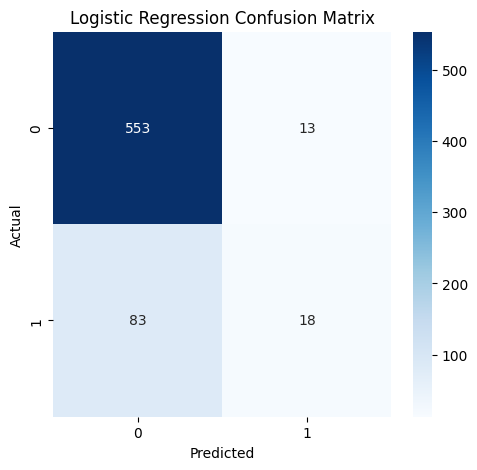

In [1405]:
# Plot Confusion Matrix
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(log_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')


##### True Negatives (TN = 553): Customers correctly identified as not churning.
##### False Positives (FP = 13): Customers incorrectly predicted to churn.
##### False Negatives (FN = 83): Customers who churned but were not identified by the model.
##### True Positives (TP = 18): Customers correctly predicted to churn.

### Key Takeaways:
##### The model is very good at identifying non-churners (high TN).
##### However, it misses many actual churners (high FN), which is reflected in the low recall.
##### This makes the model conservative — it avoids false alarms but at the cost of missing many churners.

In [1406]:
# ROC curve
log_tpr, log_fpr, _ =roc_curve(y_test, log_pobs)
log_auc = auc(log_tpr, log_fpr)

In [1407]:
##### Area under the curve
log_auc

0.8330301228002658

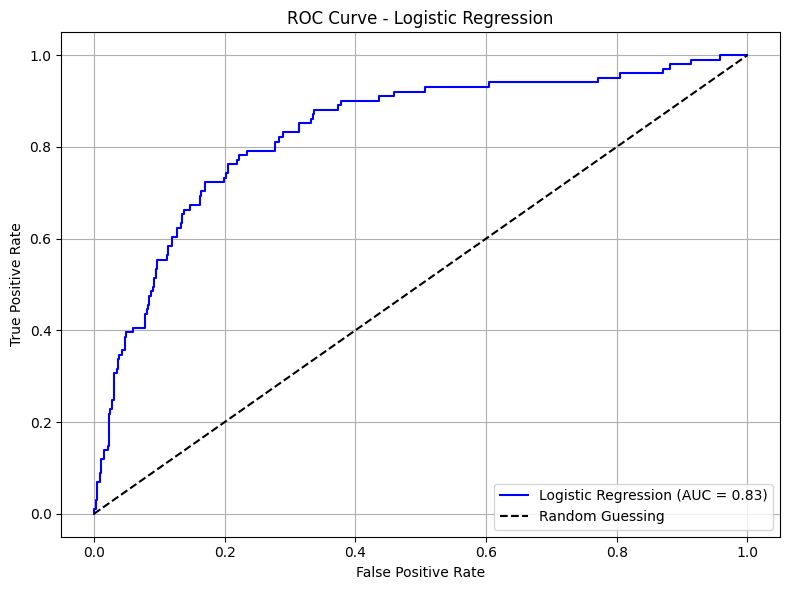

In [1408]:
# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(log_tpr, log_fpr, label=f'Logistic Regression (AUC = {log_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()



##### The AUC (Area Under Curve) for Logistic Regression is 0.84, which is considered very good
##### Even though the confusion matrix shows low recall, the ROC curve suggests that with a different threshold, the model could perform better in identifying churners (strong class separation ability).

# Random Forest

In [1409]:
# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
print('Intercept:', log_model.intercept_)
print('Coefficients:', log_model.coef_)

Intercept: [-2.31121008]
Coefficients: [[ 0.02470776  0.61628852 -0.63420596  0.22769359  0.32685641 -0.00191179
   0.32729934  0.15397582  0.02993466  0.15263392  0.07117782 -0.02169096
   0.06980036  0.12585247 -0.26649466  0.13290785  0.66523912]]


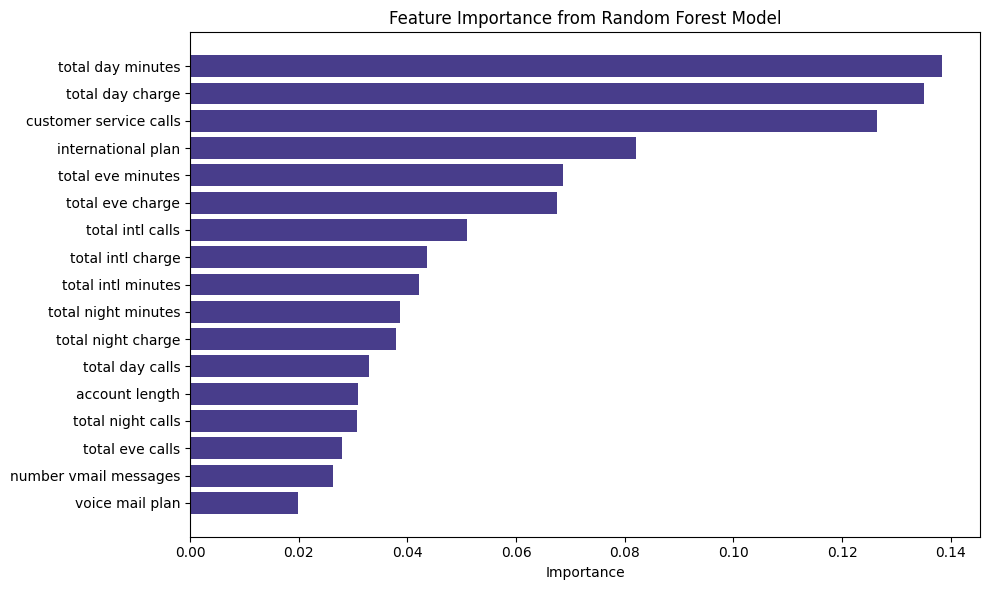

In [1410]:
# Extract feature importances
importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='darkslateblue')
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest Model')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

##### The model relies heavily on usage behavior and customer support interactions to predict churn.
##### Billing-related features (charges) are also key indicators.
##### Plan types (like international or voicemail) influence churn but to a lesser extent.

### Model Evaluation and interpretation

In [1411]:
rf_pred = rf_model.predict(X_test)
rf_prob = rf_model.predict_proba(X_test)[:, 1]
acc = accuracy_score(y_test, rf_pred)
print(f'Accuracy Score: {acc:.2f}')

print('\nClassification Report:')
print(classification_report(y_test, rf_pred))

Accuracy Score: 0.95

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       566
           1       0.92      0.71      0.80       101

    accuracy                           0.95       667
   macro avg       0.94      0.85      0.89       667
weighted avg       0.95      0.95      0.94       667



In [1412]:
# Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_pred)

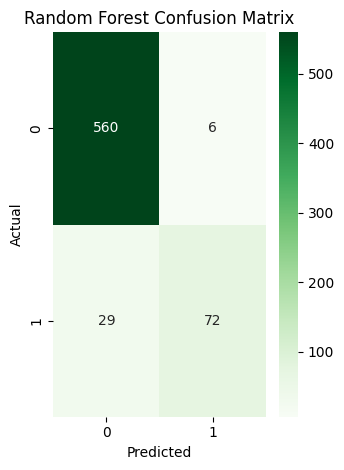

In [1413]:
# Plot confusion matrix
plt.subplot(1, 2, 2)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

##### True Negatives (TN = 560): Non-churners correctly identified.
##### False Positives (FP = 6): Non-churners incorrectly predicted to churn.
##### False Negatives (FN = 29): Churners missed by the model.
##### True Positives (TP = 72): Churners correctly identified.

### Key Takeaways:
##### The model is highly accurate in identifying both churners and non-churners.
##### Very low false positives — excellent for avoiding unnecessary retention efforts.
##### High true positives — captures most churners, making it effective for proactive retention.

In [1414]:
# ROC Curve
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_prob)
rf_auc = auc(rf_fpr, rf_tpr)

In [1415]:
rf_auc

0.9380400937620265

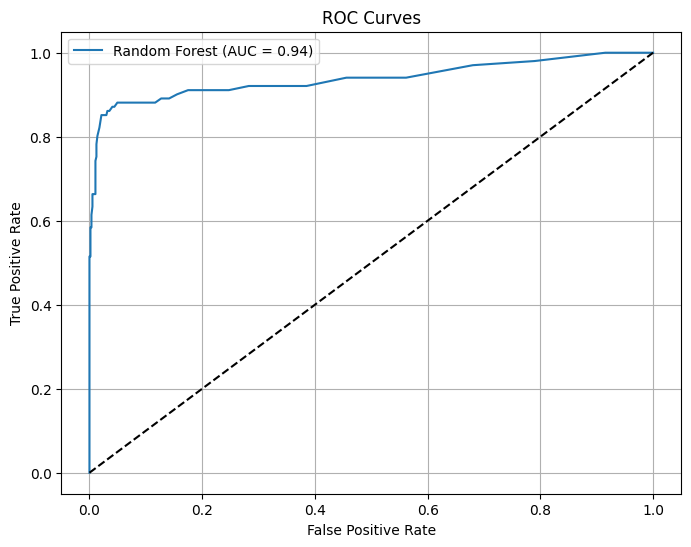

In [1416]:
# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.grid(True)
plt.show()

##### The ROC curve for Random Forest shows a steep rise toward the top-left corner.
##### The AUC (Area Under Curve) is 0.94, which is excellent.

##### The model has a very strong ability to distinguish between churners and non-churners.
##### It performs well across different classification thresholds, offering flexibility in tuning for business needs (e.g., prioritizing recall vs. precision).